# TensorFlow Batch Normalization

In [219]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

## Prepare some data for training

In [266]:
x_data = np.linspace(-4, 7, 5000)
noises = np.random.random((5000,))
y_data = x_data * x_data + noises

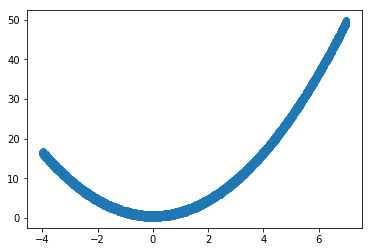

In [267]:
plt.scatter(x_data, y_data)
plt.show()

Batch the data

In [276]:
def get_batch(batch_size=32):
    global x_data, y_data
    batch_item_index = random.sample(range(1, 5000), batch_size)
    x_batch = x_data[batch_item_index][:,np.newaxis]
    y_batch = y_data[batch_item_index][:,np.newaxis]
    return x_batch, y_batch

## Build network without batch normalization

Network Parameters

In [279]:
activation = tf.nn.relu
n_input_size = 1
n_hidden_layers = 7
n_hidden_units = 30
n_output_size = 1

Placeholders

In [280]:
xs = tf.placeholder(shape=[None, n_input_size],  dtype=tf.float32, name='input')
ys = tf.placeholder(shape=[None, n_output_size], dtype=tf.float32, name='output')

Add Layer Function

In [281]:
def add_layer(inputs, in_size, out_size, activation_function=None, use_bn=False):
    Weights = tf.Variable(tf.random_normal([in_size, out_size], mean=0., stddev=1.))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

Build Network without Batch Normalization
- Save input of each layer in a list where we will use for vis later

In [282]:
# Input Layer: xs
layer_inputs = [xs]

# Add 7 Hidden Layers with 30 Hidden Units
for i in range(n_hidden_layers):
    inputs = layer_inputs[i]
    if i==0:
        h_layer = add_layer(inputs, n_input_size,   n_hidden_units, activation, use_bn=False)
    else:
        h_layer = add_layer(inputs, n_hidden_units, n_hidden_units, activation, use_bn=False)
    layer_inputs.append(h_layer)

# Output Layer
predictions = tf.layers.dense(inputs=h_layer, units=1, activation=activation)

Train and Loss

In [283]:
loss = tf.losses.absolute_difference(labels=ys, predictions=predictions)
train = tf.train.AdamOptimizer(0.0001).minimize(loss)

## Start Training

In [285]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(1000):
    x_input, y_input = get_batch()
    sess.run(train, feed_dict={
        xs: x_input,
        ys: y_input
    })
    
inputs = sess.run(layer_inputs, feed_dict={
    xs: x_data[:,np.newaxis],
    ys: y_data[:,np.newaxis]
})

## Show how the inputs distributions changes in each layer

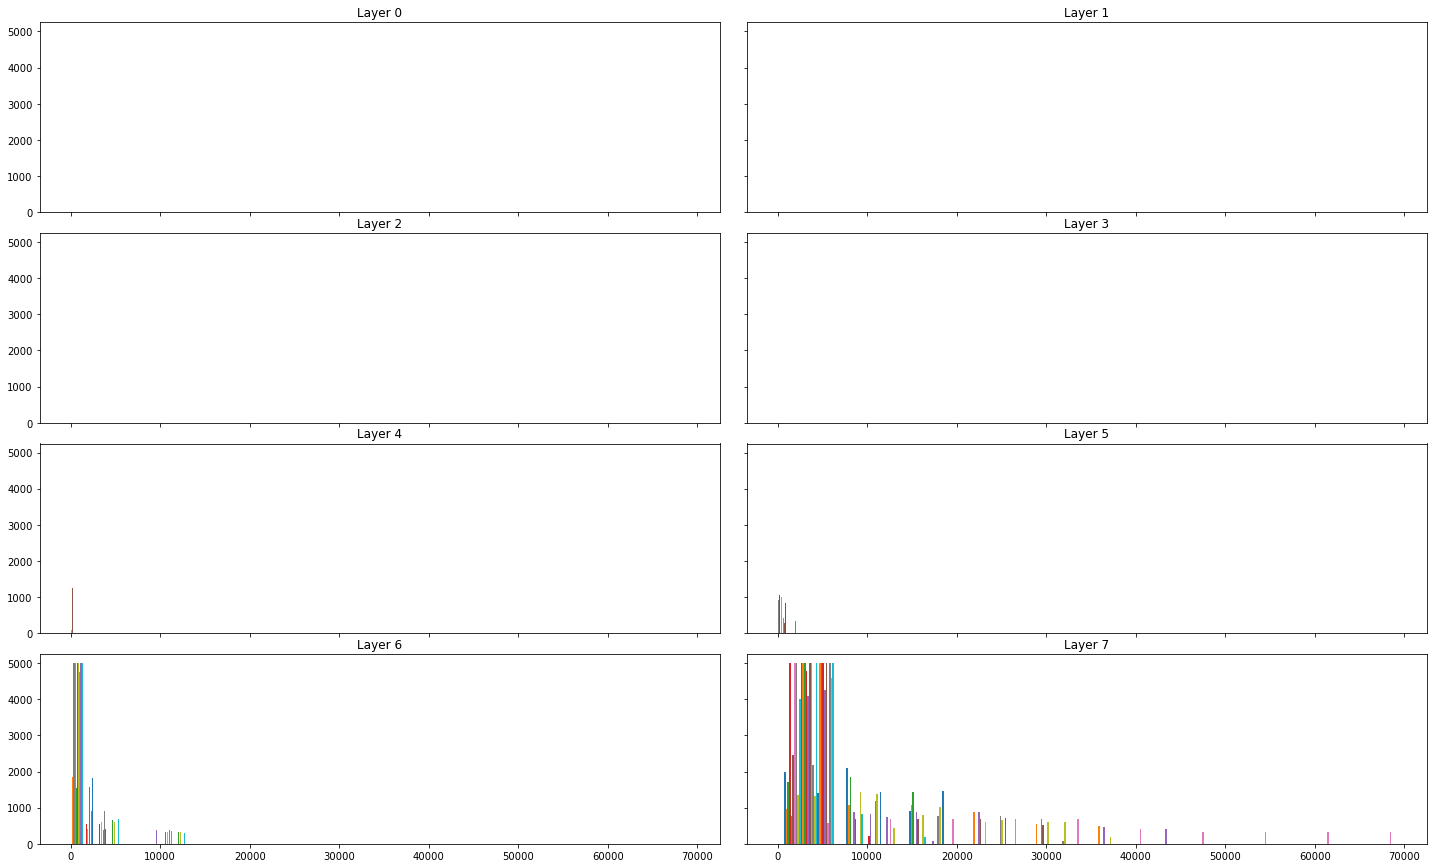

In [287]:
f, (axes_1, axes_2, axes_3, axes_4) = plt.subplots(4, 2, sharex=True, sharey=True) 

f.set_figwidth(20)
f.set_figheight(12)
f.tight_layout()

for i, ax in enumerate(list(axes_1)+list(axes_2)+list(axes_3)+list(axes_4)):
    ax.hist(inputs[i])
    ax.set_title('Layer '+str(i))

plt.show()

---

## Build Network with Batch Normalization

In [288]:
# Input Layer: xs
layer_inputs = [xs]

# Add 7 Hidden Layers with 30 Hidden Units
for i in range(n_hidden_layers):
    h_layer = tf.layers.dense(inputs=layer_inputs[i], units=n_hidden_units)
    h_layer_bn = tf.layers.batch_normalization(inputs=h_layer)
    h_layer_bn_ac = activation(h_layer_bn)
    layer_inputs.append(h_layer_bn_ac)

# Output Layer
predictions = tf.layers.dense(inputs=h_layer_bn_ac, units=1, activation=activation)

## Start Training

In [289]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(1000):
    x_input, y_input = get_batch()
    sess.run(train, feed_dict={
        xs: x_input,
        ys: y_input
    })
    
inputs = sess.run(layer_inputs, feed_dict={
    xs: x_data[:,np.newaxis],
    ys: y_data[:,np.newaxis]
})

## Show how the inputs distributions changes in each layer

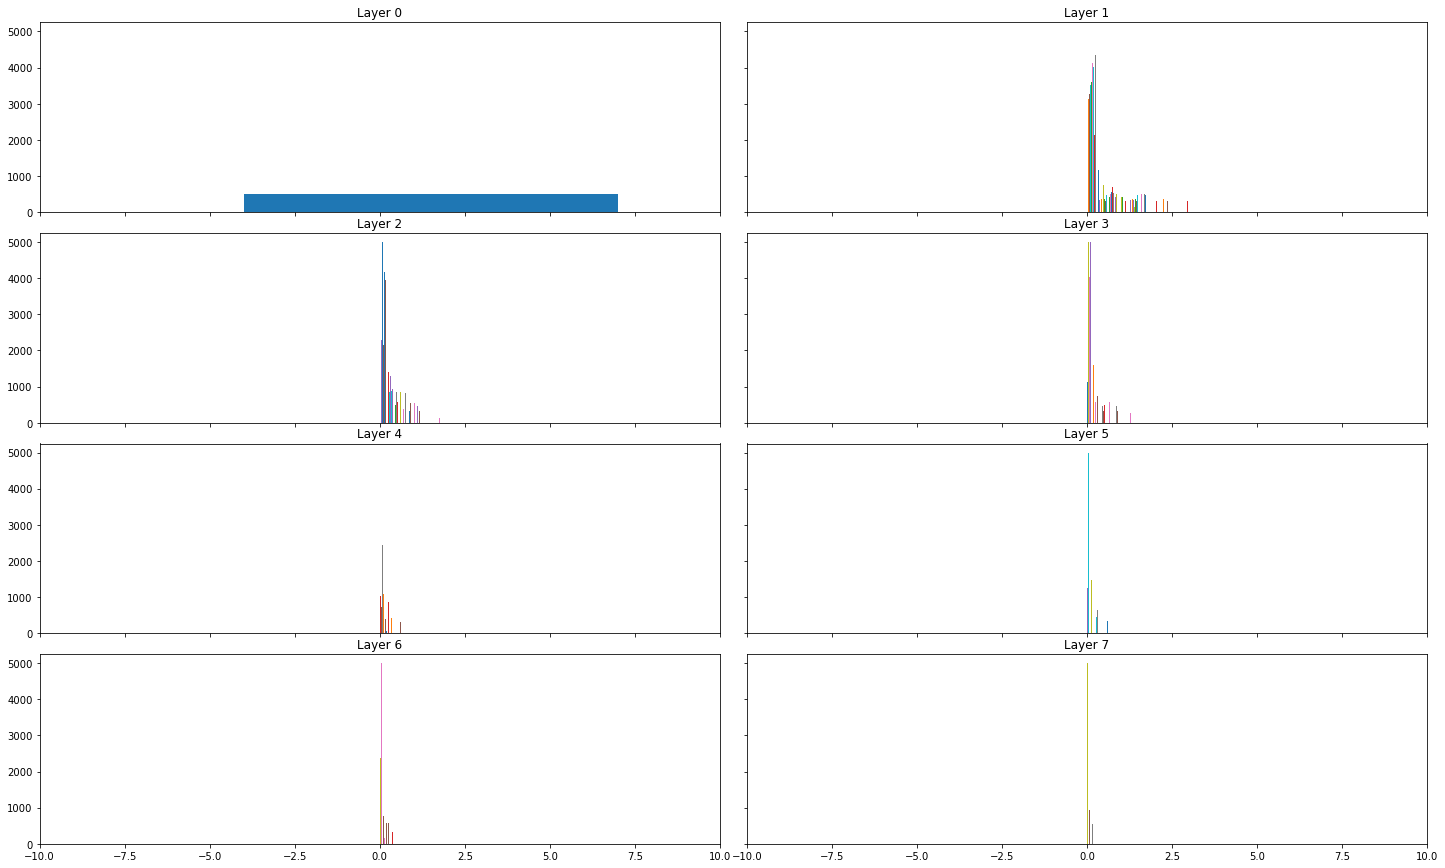

In [295]:
f, (axes_1, axes_2, axes_3, axes_4) = plt.subplots(4, 2, sharex=True, sharey=True) 

f.set_figwidth(20)
f.set_figheight(12)
f.tight_layout()

for i, ax in enumerate(list(axes_1)+list(axes_2)+list(axes_3)+list(axes_4)):
    ax.hist(inputs[i])
    ax.set_xlim((-10, 10))
    ax.set_title('Layer '+str(i))

plt.show()